In [1]:
import numpy as np

def pol2car(r, theta):
    return np.array([r * np.cos(theta), r * np.sin(theta)])

def strategy_1():
    r, theta = np.sqrt(np.random.uniform(0, 1)), np.random.uniform(0, 2*np.pi)
    
    E_r = 1/2
    E_dist = np.linalg.norm(r - E_r)
    
    if r > 1/2:
        A_theta = np.random.uniform(0, 2*np.pi)
        A_xy = pol2car(r, A_theta)
    else:
        A_xy = np.array([0, 0])
    
    xy = pol2car(r, theta)
    
    A_dist = np.linalg.norm(xy - A_xy)

    return 'A' if A_dist < E_dist else 'E'

def strategy_2():
    r, theta = np.sqrt(np.random.uniform(0, 1)), np.random.uniform(0, 2*np.pi)
    
    E_r = 1/2
    E_dist = np.linalg.norm(r - E_r)
    A_xy = np.array([0, 0])
    
    xy = pol2car(r, theta)
    
    A_dist = np.linalg.norm(xy - A_xy)

    return 'A' if A_dist < E_dist else 'E'

def strategy_3():
    r, theta = np.sqrt(np.random.uniform(0, 1)), np.random.uniform(0, 2*np.pi)
    
    E_r = 1/2
    E_dist = np.linalg.norm(r - E_r)
    
    A_theta = np.random.uniform(0, 2*np.pi)
    A_xy = pol2car(r, A_theta)
    
    xy = pol2car(r, theta)
    
    A_dist = np.linalg.norm(xy - A_xy)

    return 'A' if A_dist < E_dist else 'E'

def strategy_4(thr):
    r, theta = np.sqrt(np.random.uniform(0, 1)), np.random.uniform(0, 2*np.pi)
    
    E_r = 1/2
    E_dist = np.linalg.norm(r - E_r)
    
    if r > thr:
        A_theta = np.random.uniform(0, 2*np.pi)
        A_xy = pol2car(r, A_theta)
    else:
        A_xy = np.array([0, 0])
    
    xy = pol2car(r, theta)
    
    A_dist = np.linalg.norm(xy - A_xy)

    return 'A' if A_dist < E_dist else 'E'

def run(N, strategy):
    f = {'A': 0, 'E': 0}
    
    for _ in range(N):
        f[strategy()] += 1
    
    f = {k: v / N for k,v in f.items()}
    return f

In [2]:
N = 1_000_000
run(N, strategy_1)

{'A': 0.142573, 'E': 0.857427}

In [3]:
run(N, strategy_2)

{'A': 0.062325, 'E': 0.937675}

In [4]:
run(N, strategy_3)

{'A': 0.145923, 'E': 0.854077}

In [5]:
import matplotlib.pyplot as plt

0/100
1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100


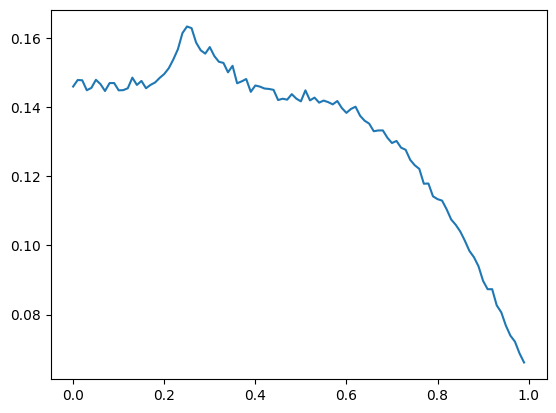

In [8]:
res_all = []

s = np.arange(0, 1, 0.01)
for i, thr in enumerate(s):
    print(f"{i}/{len(s)}")
    res = run(100_000, lambda: strategy_4(thr))
    res_all.append(res['A'])

plt.plot(s, res_all)

In [9]:
q = max(res_all)
res_all.index(q), q

(25, 0.16326)

In [ ]:
def convg(strategy, delta):
    t = 0
    lst = 0
    N = 0
    k = 1000
    
    while True:
        N += 1
        t += 1 if strategy() == 'A' else 0

        if N > 100_000 and t > 0 and np.abs(t/N-lst) < delta:
            k -= 1

        if k == 0:
            break

        lst = t/N

    return t/N, N

convg(strategy_4, 1e-6)